In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Bass diffusion model

$$
\frac{d}{dt}F(t) = (p + q F(t))(1 - F(t))
$$

## Fully connected network

In [274]:
b = np.array([1, 2, 3])
b[-2:] = 4
b

array([1, 4, 4])

In [296]:
def update(array, p, q):
    positives = np.array([el for el in array if el])
    negatives = np.array([el for el in array if not el])
    
    # Innovators
    num_innovators = int(p * len(negatives))
    if num_innovators:
        negatives[:int(p * len(negatives))] = True
    else:
        negatives[:1] = True  # At least one innovator.
    
    # Imitators
    num_of_influenced = int(q * len(positives))
    if num_of_influenced:
        negatives[-num_of_influenced:] = True
    
    return np.concatenate([positives, negatives])

In [309]:
SIZE = 10 ** 5
field = np.zeros(SIZE)
field[:10] = 1
results = [field.mean(), ]
fields = [field, ]
while not np.all(field == 1):
    field = update(field, p=0.03 / 52, q = 0.38 / 52)
    fields.append(field)
    results.append(field.mean())
len(results)

382

In [310]:
diffs = [sum(f2) - sum(f1) for f1, f2 in zip(fields[:-1], fields[1:])]

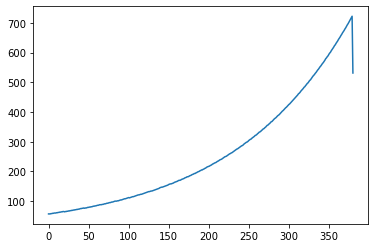

In [311]:
plt.plot(diffs)

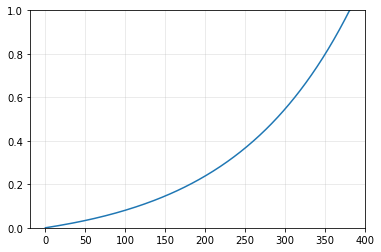

In [312]:
plt.plot(results)
plt.ylim([0, 1])
plt.grid(alpha=0.3)
plt.show()

In [ ]:
def udate(array, p, q):
    array = array.copy()
    trues = [el for el in array if el]
    falses = [el for el in array if not el]
    
    array[:int ]